# Visualizing with the `ggpy`
***

In [1]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.0)
cp = sns.color_palette()

In [3]:
from ggplot import *

<br/>

### Thing 1: Line Chart (with many lines)
***

In [4]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [5]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


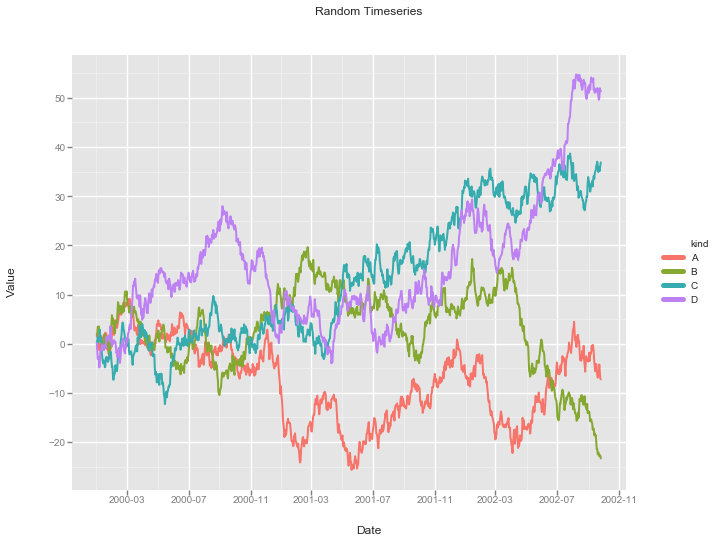

<ggplot: (293521997)>

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

g = ggplot(ts, aes(x='dt', y='value', color='kind')) + \
        geom_line(size=2.0) + \
        xlab('Date') + \
        ylab('Value') + \
        ggtitle('Random Timeseries')
g

<br/>

### Thing 2: Scatter
***

In [7]:
df = pd.read_csv('data/iris.csv')
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


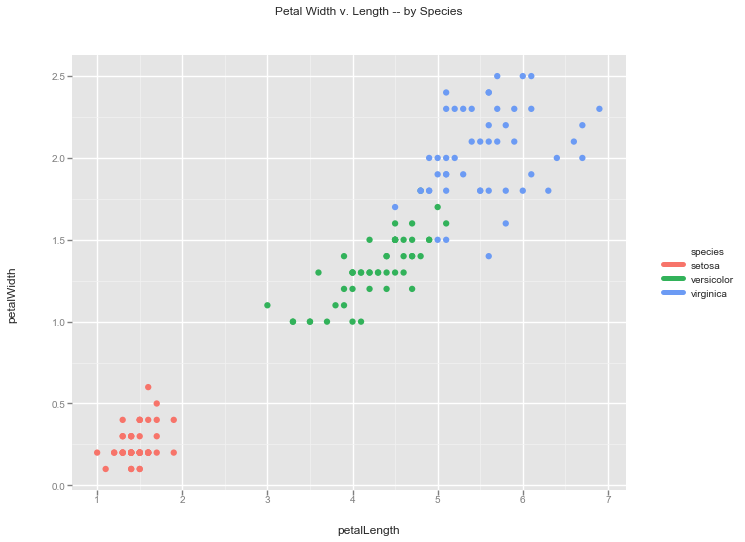

<ggplot: (293583489)>

In [8]:
g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        geom_point(size=40.0) + \
        ggtitle('Petal Width v. Length -- by Species')
g

<br/>

### Thing 3: Trellising the Above
***

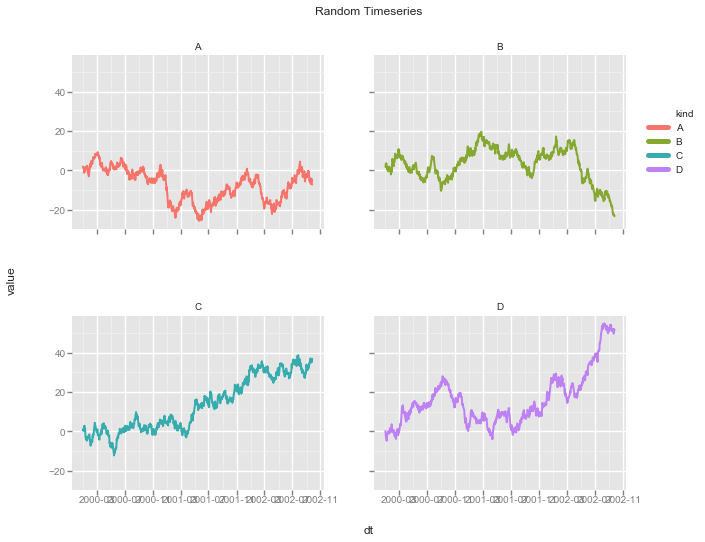

<ggplot: (294393961)>

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

g = ggplot(ts, aes(x='dt', y='value', color='kind')) + \
        geom_line(size=2.0) + \
        facet_wrap(x='kind', ncol=2) + \
        ggtitle('Random Timeseries')
g

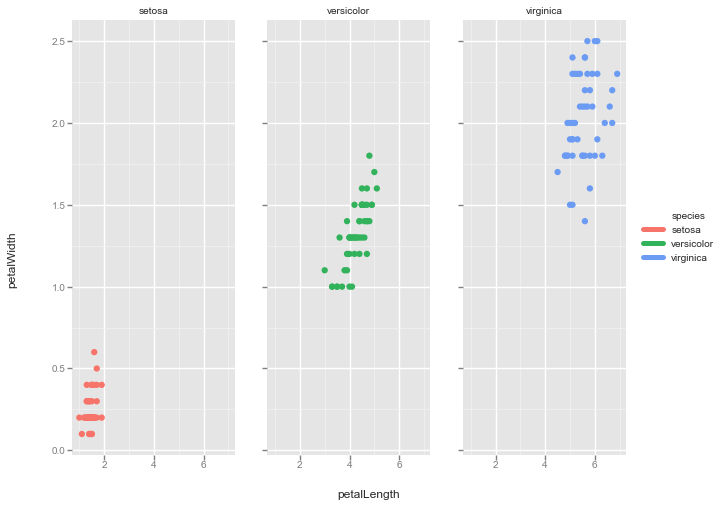

<ggplot: (293152633)>

In [10]:
g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        facet_grid(y='species') + \
        geom_point(size=40.0)
g

In [11]:
tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = np.random.permutation(['A'] * tmp_n + ['B'] * (df.shape[0] - tmp_n))
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species,random_factor
0,1.4,0.2,5.1,3.5,setosa,B
1,1.4,0.2,4.9,3.0,setosa,B
2,1.3,0.2,4.7,3.2,setosa,A
3,1.5,0.2,4.6,3.1,setosa,A
4,1.4,0.2,5.0,3.6,setosa,A


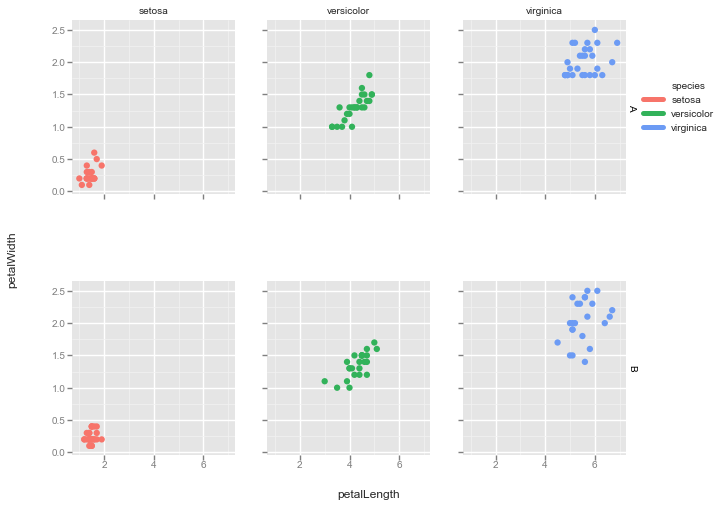

<ggplot: (295716085)>

In [12]:
g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        facet_grid(x='random_factor', y='species') + \
        geom_point(size=40.0)
g

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

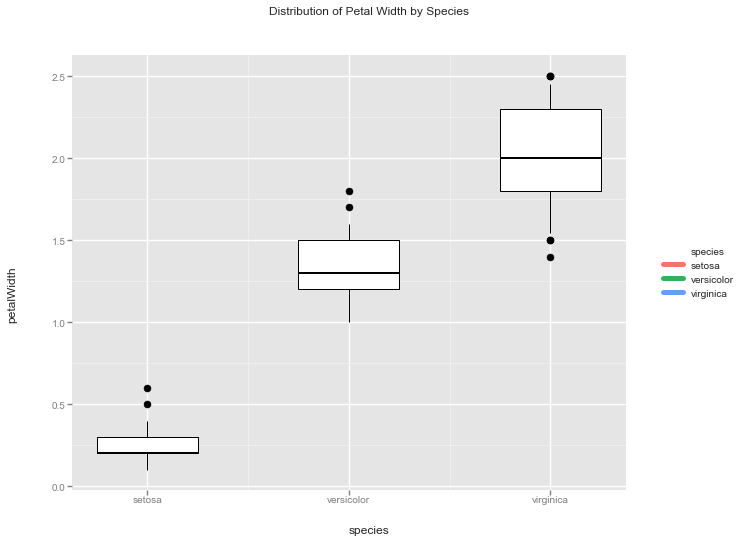

<ggplot: (297585805)>

In [13]:
g = ggplot(df, aes(x='species',
                   y='petalWidth',
                   fill='species')) + \
        geom_boxplot() + \
        ggtitle('Distribution of Petal Width by Species')
g

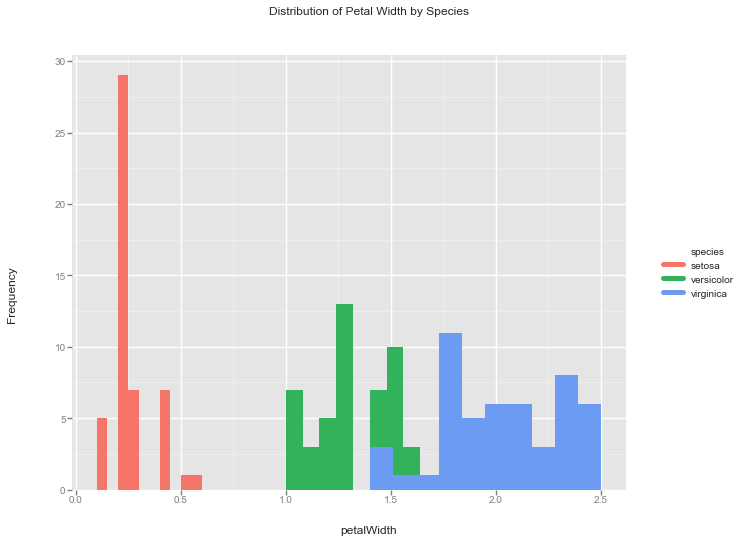

<ggplot: (297886001)>

In [14]:
g = ggplot(df, aes(x='petalWidth',
                   fill='species')) + \
        geom_histogram() + \
        ylab('Frequency') + \
        ggtitle('Distribution of Petal Width by Species')
g

<br/>

### Thing 5: Bar Chart
***

In [15]:
df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

fare
survived pclass           
0        1       64.684008
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

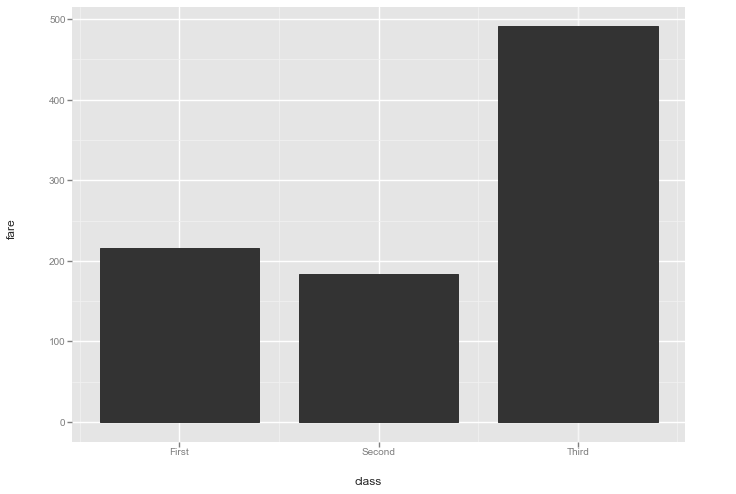

<ggplot: (296106953)>

In [17]:
g = ggplot(df, aes(x='class', y='fare')) + \
        geom_bar()
g

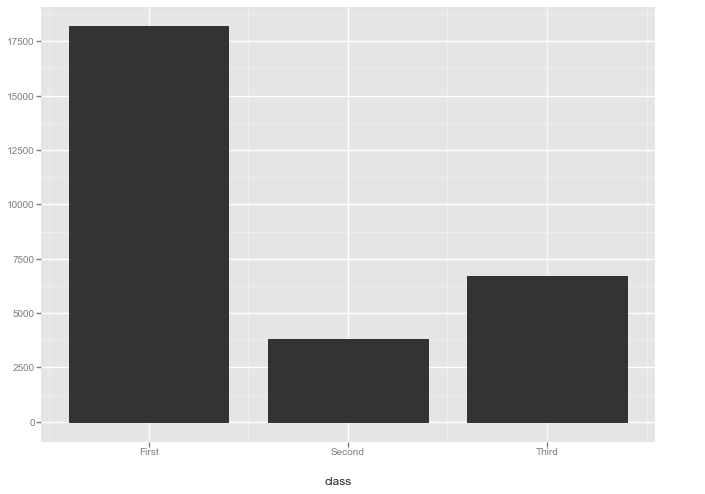

<ggplot: (298384553)>

In [18]:
g = ggplot(df, aes(x='class', weight='fare')) + \
        geom_bar()
g

In [19]:
df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index()

,class,survived,fare
0,First,0,64.684008
1,First,1,95.608029
2,Second,0,19.412328
3,Second,1,22.055700
4,Third,0,13.669364
5,Third,1,13.694887


/Users/dsaber/anaconda/lib/python2.7/site-packages/ggplot/ggplot.py:602: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fill_levels = self.data[[fillcol_raw, fillcol]].sort(fillcol_raw)[fillcol].unique()


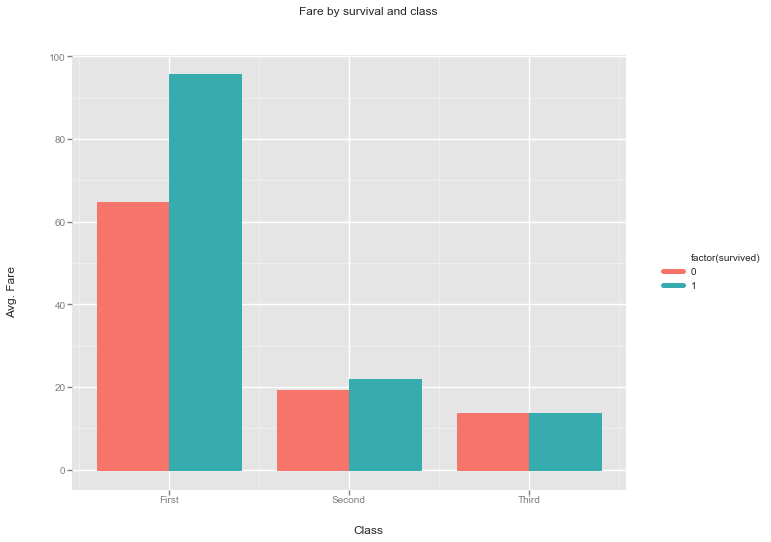

<ggplot: (297661029)>

In [20]:
g = ggplot(df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index(), aes(x='class',
                                  fill='factor(survived)',
                                  weight='fare',
                                  y='fare')) + \
        geom_bar() + \
        ylab('Avg. Fare') + \
        xlab('Class') + \
        ggtitle('Fare by survival and class') 
g

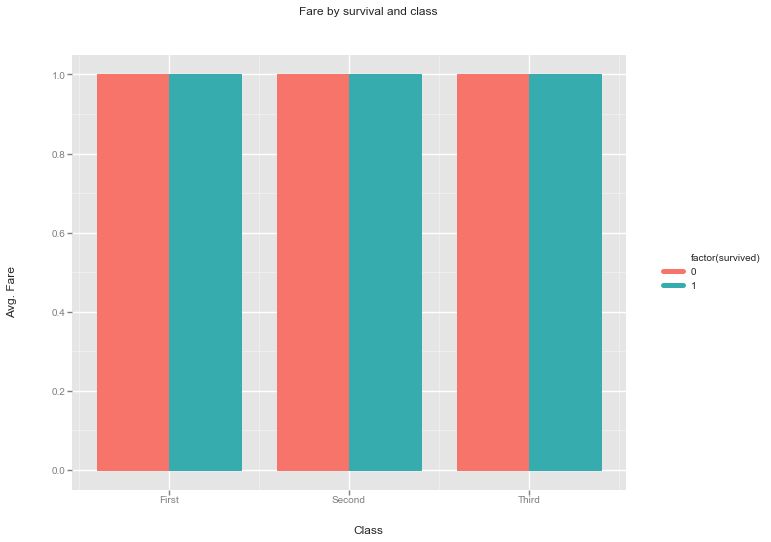

<ggplot: (298427109)>

In [21]:
g = ggplot(df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index(), aes(x='class',
                                  fill='factor(survived)',
                                  y='fare')) + \
        geom_bar() + \
        ylab('Avg. Fare') + \
        xlab('Class') + \
        ggtitle('Fare by survival and class') 
g

In [23]:
# # in R, I believe you'd do something like this:

ggplot(df, aes(x=factor(survived), y=fare)) +
    stat_summary_bin(aes(fill=factor(survived)),
                     fun.y="mean",
                     geom="bar") +
    facet_wrap(~class)
    
# # damn ggplot2 is awesome...